In [1]:
!pip install keybert

In [2]:
!pip install wordcloud

In [3]:
!pip install tqdm

In [4]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import keybert

In [5]:
Comments_After = pd.read_csv('Popular_Comments_After.csv')
Comments_Before = pd.read_csv('Popular_Comments_Before.csv')

In [6]:

model = keybert.KeyBERT()

In [7]:
keywords_list = []
for row_i in tqdm(range(Comments_After.shape[0])):
    row = Comments_After.iloc[row_i]
    keywords = []
    title_abstract = row['text'] 
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,1)))
    keywords.append(model.extract_keywords(title_abstract,
                       keyphrase_ngram_range = (1,2)))
    keywords_list.append(keywords)

  0%|          | 0/500 [00:00<?, ?it/s]

In [8]:
Comments_Before['keywords'] = keywords_list

In [9]:
Comments_Before

,Unnamed: 0.1,Unnamed: 0,videoId,author,publishedAt,likeCount,text,period,keywords
0,0,44,bQNsHivR9AU,@jochenkrebs9685,2022-10-20T19:19:36Z,7917,Schade dass Politiker nicht persönlich für das...,Before Founding,"[[(keine, 0.4463), (kriege, 0.4205), (es, 0.40..."
1,1,121,kyUaDbVjMr0,@seemax7956,2021-11-19T07:22:26Z,7385,Um Loriot zu zitieren „In Krisenzeiten suchen ...,Before Founding,"[[(diplomatie, 0.4547), (unsere, 0.4443), (ges..."
2,2,40,bQNsHivR9AU,@sternmeer5346,2022-10-20T19:04:43Z,5816,"Absolut jedes Wort, das Sie zur Beschreibung d...",Before Founding,"[[(propaganda, 0.4457), (kämpfen, 0.3681), (mü..."
3,3,0,WCwx94TOGPQ,@andreasmann1111,2022-02-03T19:47:21Z,5571,Liebe Sahra schön dich gesund zu sehen. Im Geg...,Before Founding,"[[(rechtliche, 0.5163), (aufgepasst, 0.4733), ..."
4,4,332,LbnRTQTJ7bQ,@fffrankk,2022-01-27T19:56:17Z,5275,"Wie üblich: Tausend Dank dafür, eine der wenig...",Before Founding,"[[(deutschland, 0.4927), (bloß, 0.3934), (hint..."
...,...,...,...,...,...,...,...,...,...
495,495,160,aIylqpDNVIc,@letters_of_bach,2023-03-15T17:34:30Z,501,Bitte endlich Frieden!!!,Before Founding,"[[(politiklandschaft, 0.5798), (deutsche, 0.48..."
496,496,227,ulaw8J_YFLw,@lucasstolz3717,2023-06-16T16:10:16Z,500,Freiheit für Julian assange. Wikileaks muss ar...,Before Founding,"[[(wagenknecht, 0.463), (auftreten, 0.4252), (..."
497,497,1022,UDGl7rCLrVI,@Flo-1887,2021-02-18T16:09:02Z,500,Wie recht Sie mal wieder haben Frau Wagenknecht!,Before Founding,"[[(wagenknecht, 0.4159), (hervorragend, 0.3648..."
498,498,1236,x4ms74GOJq8,@martinafueck,2023-09-07T16:50:40Z,499,"Die Ampel muss unbedingt abtreten, sonst fährt...",Before Founding,"[[(spaß, 0.5446), (gemacht, 0.5274), (toll, 0...."


In [10]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [11]:
flattened_keywords = flatten(flatten(keywords_list))

In [12]:
flattened_keywords = [item[0] for item in flattened_keywords]

In [13]:
flattened_keywords


['keine',
 'kriege',
 'es',
 'müssten',
 'politiker',
 'keine kriege',
 'es gäbe',
 'müssten politiker',
 'die es',
 'gäbe keine',
 'diplomatie',
 'unsere',
 'geschichte',
 'schande',
 'eine',
 'unsere diplomatie',
 'diplomatie ist',
 'unsere geschichte',
 'eine schande',
 'frieden vermitteln',
 'propaganda',
 'kämpfen',
 'müssen',
 'orwell',
 'geschrei',
 'krieg propaganda',
 'kämpfen müssen',
 'george orwell',
 'propaganda das',
 'propaganda',
 'rechtliche',
 'aufgepasst',
 'öffentlich',
 'menschen',
 'diskussion',
 'rechtliche gut',
 'öffentlich rechtliche',
 'das diskussion',
 'gut aufgepasst',
 'rechtliche',
 'deutschland',
 'bloß',
 'hinterher',
 'sondern',
 'keine',
 'deutschland hat',
 'deutschland',
 'position sondern',
 'usa hinterher',
 'rennt bloß',
 'moderatoren',
 'dazwischen',
 'quatschen',
 'immer',
 'die',
 'die moderatoren',
 'moderatoren immer',
 'moderatoren',
 'immer dazwischen',
 'quatschen die',
 'hoffentlich',
 'zuhaus',
 'bald',
 'allein',
 'ist',
 'hoffentlich

In [14]:
keywords_df = pd.DataFrame()
keywords_df['words'] = Counter(flattened_keywords).keys()
keywords_df['numbers'] = Counter(flattened_keywords).values()
frequent_words = keywords_df.loc[keywords_df['numbers'] > 1].sort_values(by='numbers', ascending=False)
frequent_words


,words,numbers
73,wagenknecht,117
104,nicht,67
75,und,60
59,ist,56
80,frau wagenknecht,52
...,...,...
914,hohen,2
913,dazwischenschreien,2
912,und frieden,2
909,ohne waffen,2


In [19]:

import json 

json_str = frequent_words.to_json(orient="records", indent=2, force_ascii=False)

with open("Sahra_Wagenknecht_Words_A.json", "w", encoding="utf-8") as f:
    f.write(json_str)

In [20]:
# Define custom list of words to exclude (case insensitive)
filtered_words = ["Wagenknecht", "ich", "und", "nicht", "das", "ist", "zu", "der", "eine"]

# Filter out words by lowercasing
filtered_keywords = [w for w in flattened_keywords if w.lower() not in [fw.lower() for fw in filtered_words]]


In [21]:
wordcloud = WordCloud(background_color="white",
                      width=2500,
                      height=1000,
                      scale=2.0,
                      colormap='twilight',
                      stopwords=['wagenknecht','Wagenknecht'],
                      min_font_size=6).fit_words(dict(Counter(filtered_keywords))).to_file('sahra_wagenknecht_after_word_cloud.png')

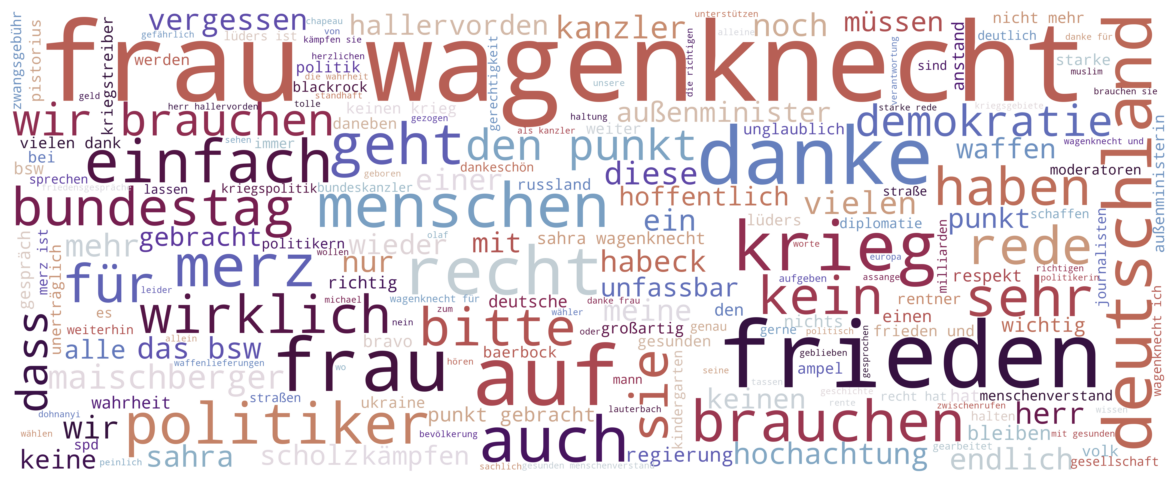

In [22]:
plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()